# Problem Statement - ML Project - Coded



## Problem 1

### CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.


### The primary objective is to leverage machine learning to build a predictive model capable of forecasting which political party a voter is likely to support. This predictive model, developed based on the provided information, will serve as the foundation for creating an exit poll. The exit poll aims to contribute to the accurate prediction of the overall election outcomes, including determining which party is likely to secure the majority of seats.




## Data Description

vote: Party choice: Conservative or Labour
age: in years
economic.cond.national: Assessment of current national economic conditions, 1 to 5.
economic.cond.household: Assessment of current household economic conditions, 1 to 5.
Blair: Assessment of the Labour leader, 1 to 5.
Hague: Assessment of the Conservative leader, 1 to 5.
Europe: an 11-point scale that measures respondents' attitudes toward European integration.   High scores represent ‘Eurosceptic’ sentiment.
political.knowledge: Knowledge of parties' positions on European integration, 0 to 3.
gender: female or male.
 

## 1.1 Define the problem and perform exploratory Data Analysis

### 1.1.1 Import the libraries

In [1]:
# Pandas and Numpy libraries
# Pandas for data manipulation
# Numpy for numeric calculation
import pandas as pd
import numpy as np

# For preprocessing the data
from sklearn import preprocessing

# To split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
# For plotting graphs
import seaborn as sns
import matplotlib.pyplot as plt

# For scaling the data
from scipy.stats import zscore

# For filtering the warning messages
import warnings 
warnings.filterwarnings("ignore")

from sklearn import tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

### 1.1.2 Loading and reading the dataset Election_Data.xls

In [2]:
df = pd.read_excel('Election_Data.xlsx')

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


### 1.1.3 Checking shape of the dataset

In [4]:
df.shape
print("The dataset has", df.shape[0], "rows and", df.shape[1], "columns.")

The dataset has 1525 rows and 10 columns.


### 1.1.4 Checking the datatypes

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


#### Insights:

* There are 10 columns, of which 8 are numerical datatype column and 2 object datatype column.
* The 'vote' and 'gender' columns are categorical columns.
* All columns have non-null values. 

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

### 1.1.5 Checking the statistical summary

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1525.0,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0


In [8]:
df.describe(include='object').T

,count,unique,top,freq
vote,1525,2,Labour,1063
gender,1525,2,female,812


#### Insights:

* The mean age of voting is 54 years. The minimum age of the person who voted is 24 years while the maximum age is 93 years.
* The assessment of the national and household economic condition is mediocre, at around 3 to 3.25, on a scale of 1 to 5. 
* The assessment of the Labour leader, Blair, seems to be higher at an average of 3.33 with the median being 4. While, the assessment of the Conservative leader, Hague, seems to be lower on an average of 2.75, the median being 2. It clearly shows that the voters like the Labour leader Blair more than Hague.
* Eurosceptic sentiment seems to be high. The average rating of Eurosceptic sentiments is 6.75, which is more than the average of 5.
* The political knowledge of the the people also seems to be moderate at an average of 1.5 with a low of 0 and a high of 3.
* The vote is mainly for the Labour party with 1063 votes. The remaining votes go for the Conservatives.
* The female voters are slightly higher than the male voters. There are 812 female voters.


### 1.1.6 Univariate Analysis

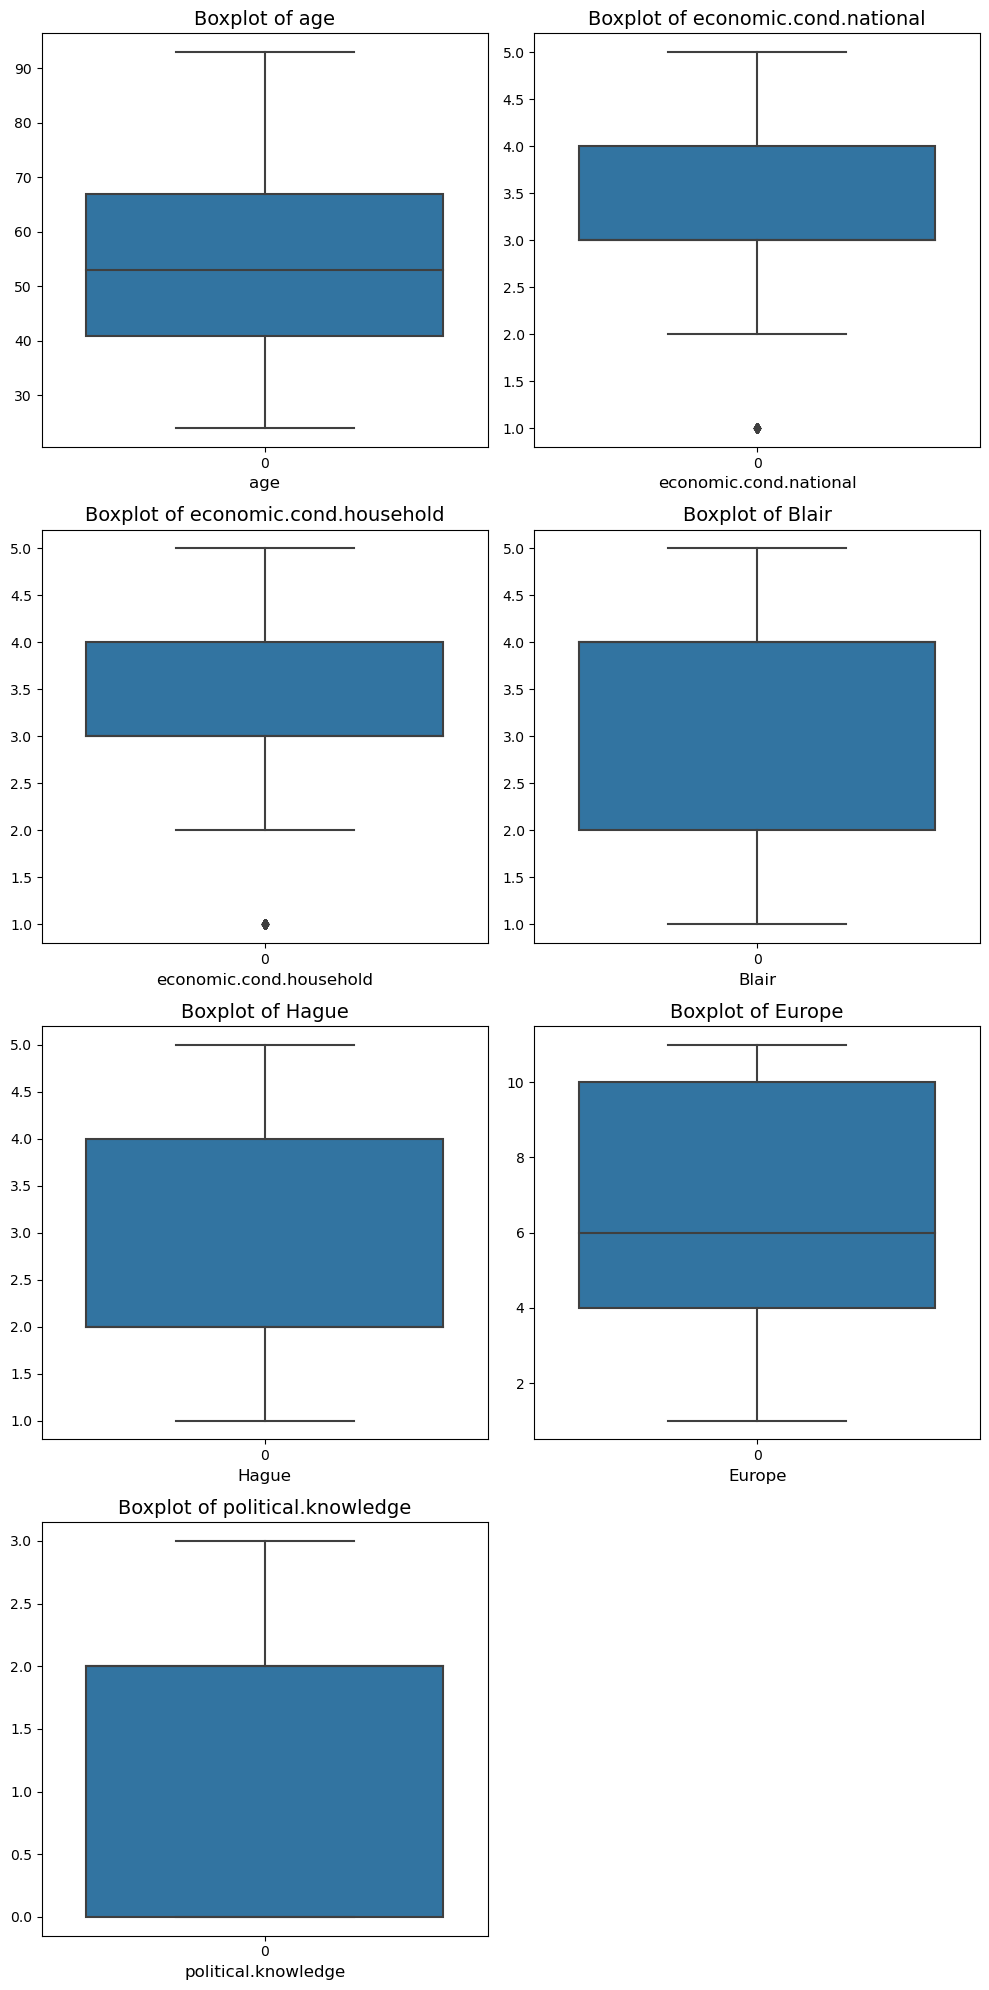

In [9]:
numcols = df[['age','economic.cond.national','economic.cond.household', 'Blair','Hague','Europe','political.knowledge']]
fig=plt.figure(figsize=(10,20))
for i in range(0,len(numcols.columns)):
    fig.add_subplot(4,2,i+1)
    sns.boxplot(numcols[numcols.columns[i]])
    plt.xlabel(numcols.columns[i],fontsize = 12)
    plt.title("Boxplot of "+numcols.columns[i], fontsize = 14)
    plt.tight_layout()

    

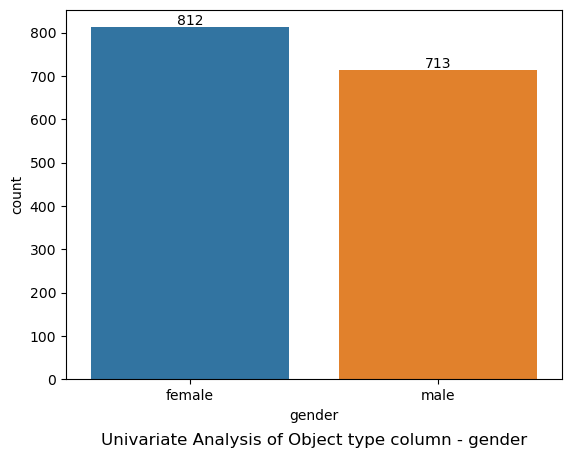

In [10]:
splot=sns.countplot(df, x=df['gender'],order=df['gender'].value_counts().index);
plt.bar_label(splot.containers[0]);
plt.title("Univariate Analysis of Object type column - gender", y=-0.2);

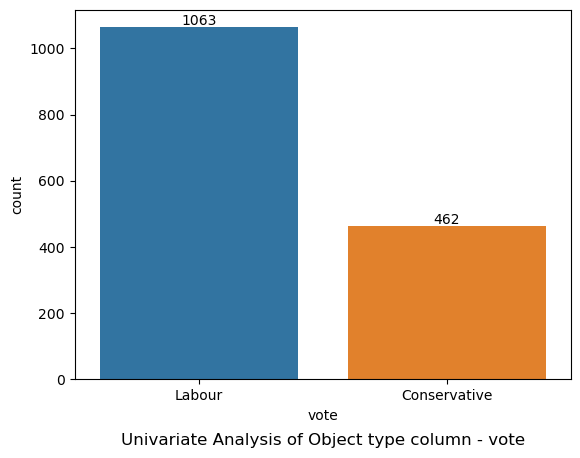

In [11]:
splot=sns.countplot(df, x=df['vote'],order=df['vote'].value_counts().index);
plt.bar_label(splot.containers[0]);
plt.title("Univariate Analysis of Object type column - vote", y=-0.2);

#### Insights:

From Boxplots:

* The median age of people who voted is 53 years. The maximum age of people who have voted has crossed 90 years.

* The assessment of national economic condition is mainly from 3 to 4. The minimum assessment is 2 and the maximum assessment is 5, which means they are from very good economical background. We can see an outlier too which has an assessment of 1, which means a few voters are from very poor economic background.

*  The assessment of household economic condition is mainly from 3 to 4. The minimum assessment is 2 and the maximum assessment is 5, which means they are from very good economical background.

* The support for the Labour leader, Blair and Conservative leader, Hague seem to be identical.

* The Eurosceptic sentiment seems to be at a median of 6 which is more than the average of 5.

* The political knowledge seems to be comparatively lower from a minimum of 0 to 2.

From Countplots:

* The number of female voters are 813 and male voters are 713. The female voters are more compared to male voters.

* The people supporting the Labour party is very high, upto 1063 compared to the Conservative supporters which add up to 462.

### 1.1.7 Multivariate Analysis

### 1.1.7.1 Categorical vs Numerical Analysis

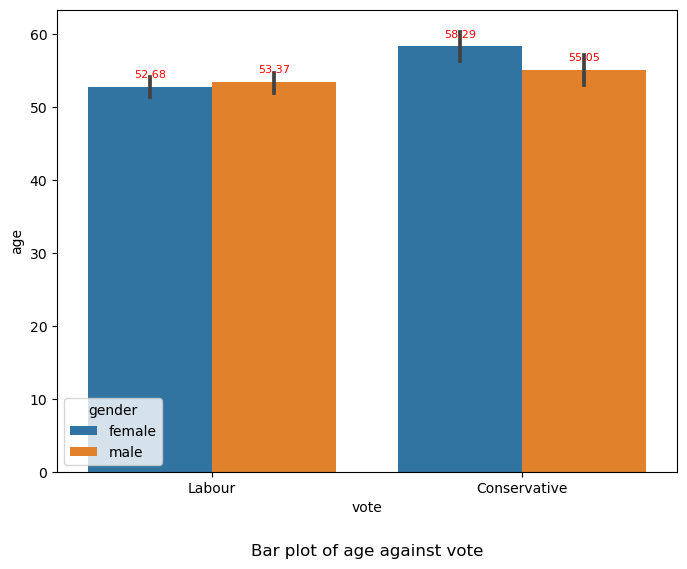

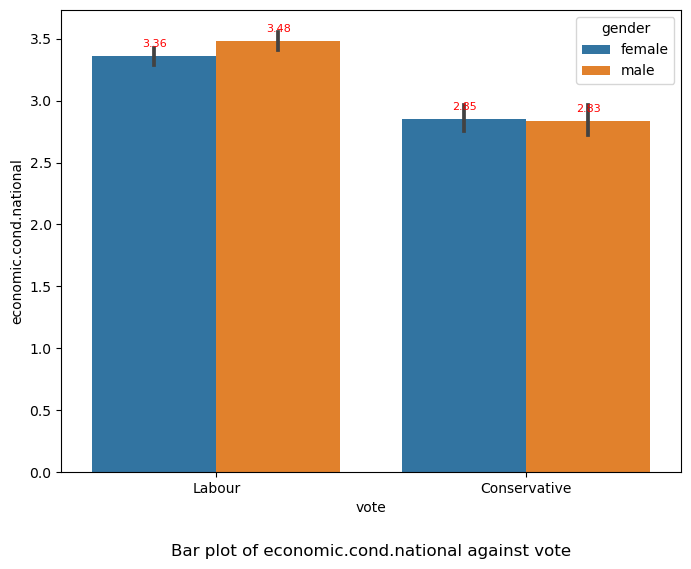

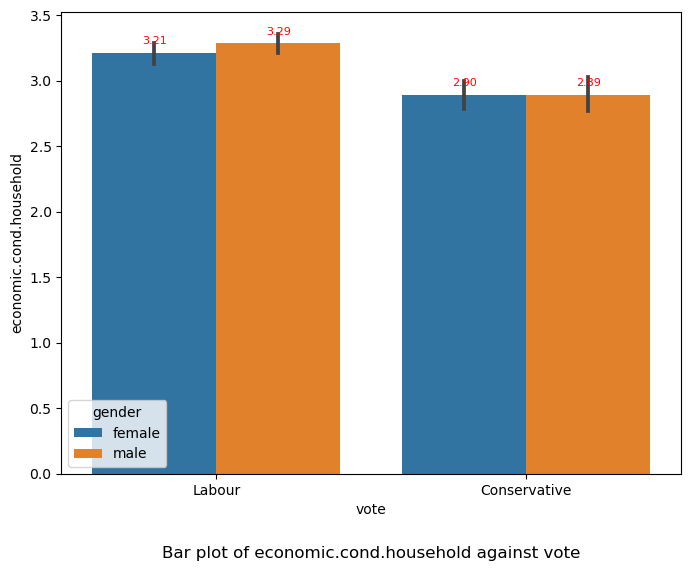

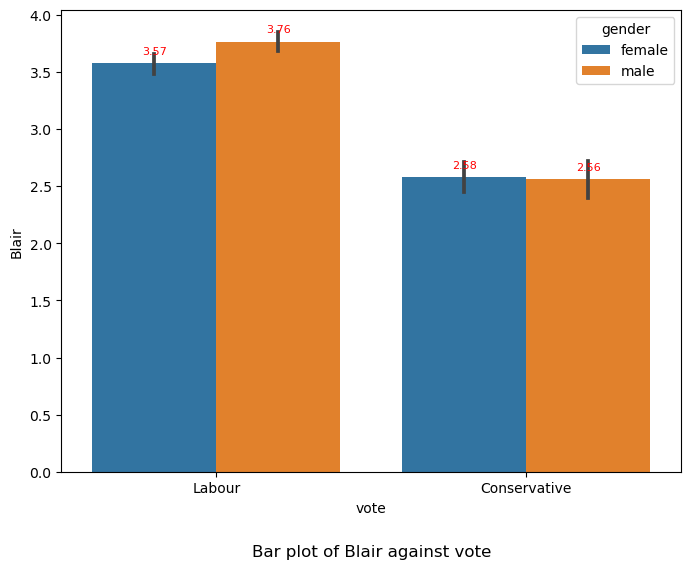

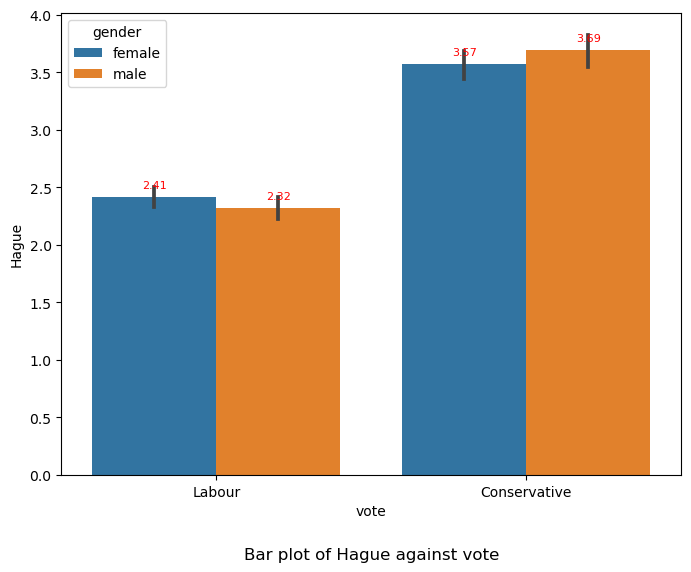

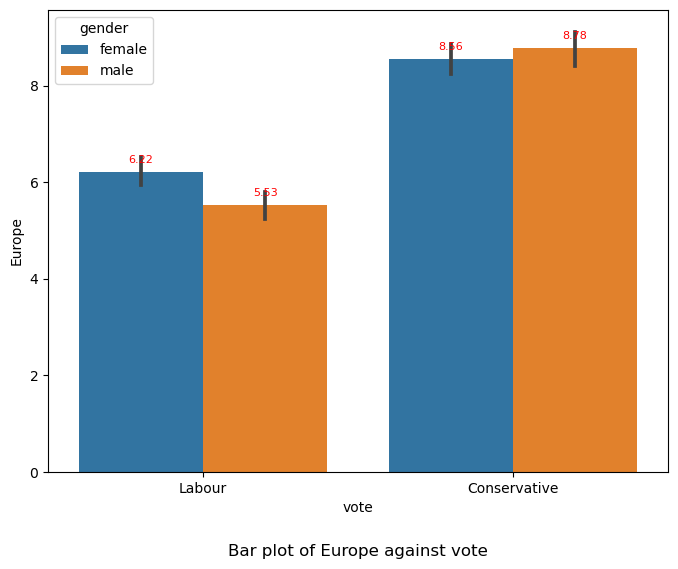

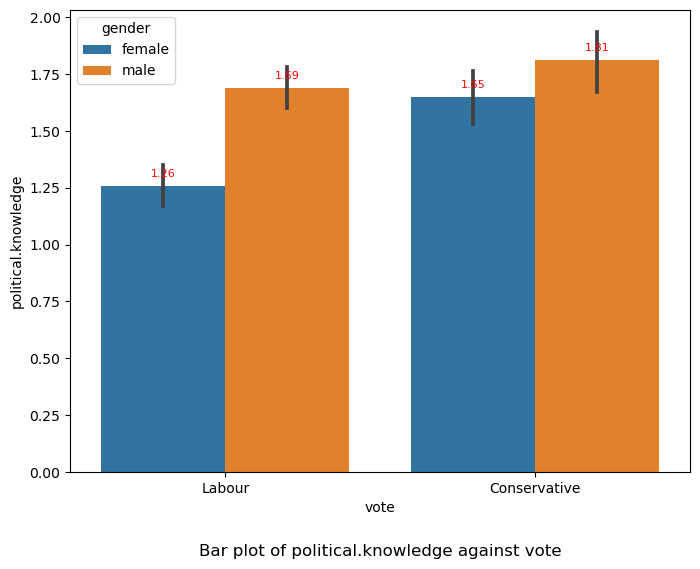

In [12]:
for i in numcols:
    plt.figure(figsize=(8, 6))
    ax=sns.barplot(x='vote', y=i, data=df, linewidth=0, edgecolor='None', hue = 'gender')
    
    plt.title(f'Bar plot of {i} against vote', y= -0.2)
    plt.xlabel('vote')
    plt.ylabel(i)
    
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', 
                    va='bottom',
                    xytext=(0, 5), 
                    textcoords='offset points',
                    fontsize=8,
                    color='red')
    
    
    plt.show()

### 1.1.7.2 Numerical vs Numerical

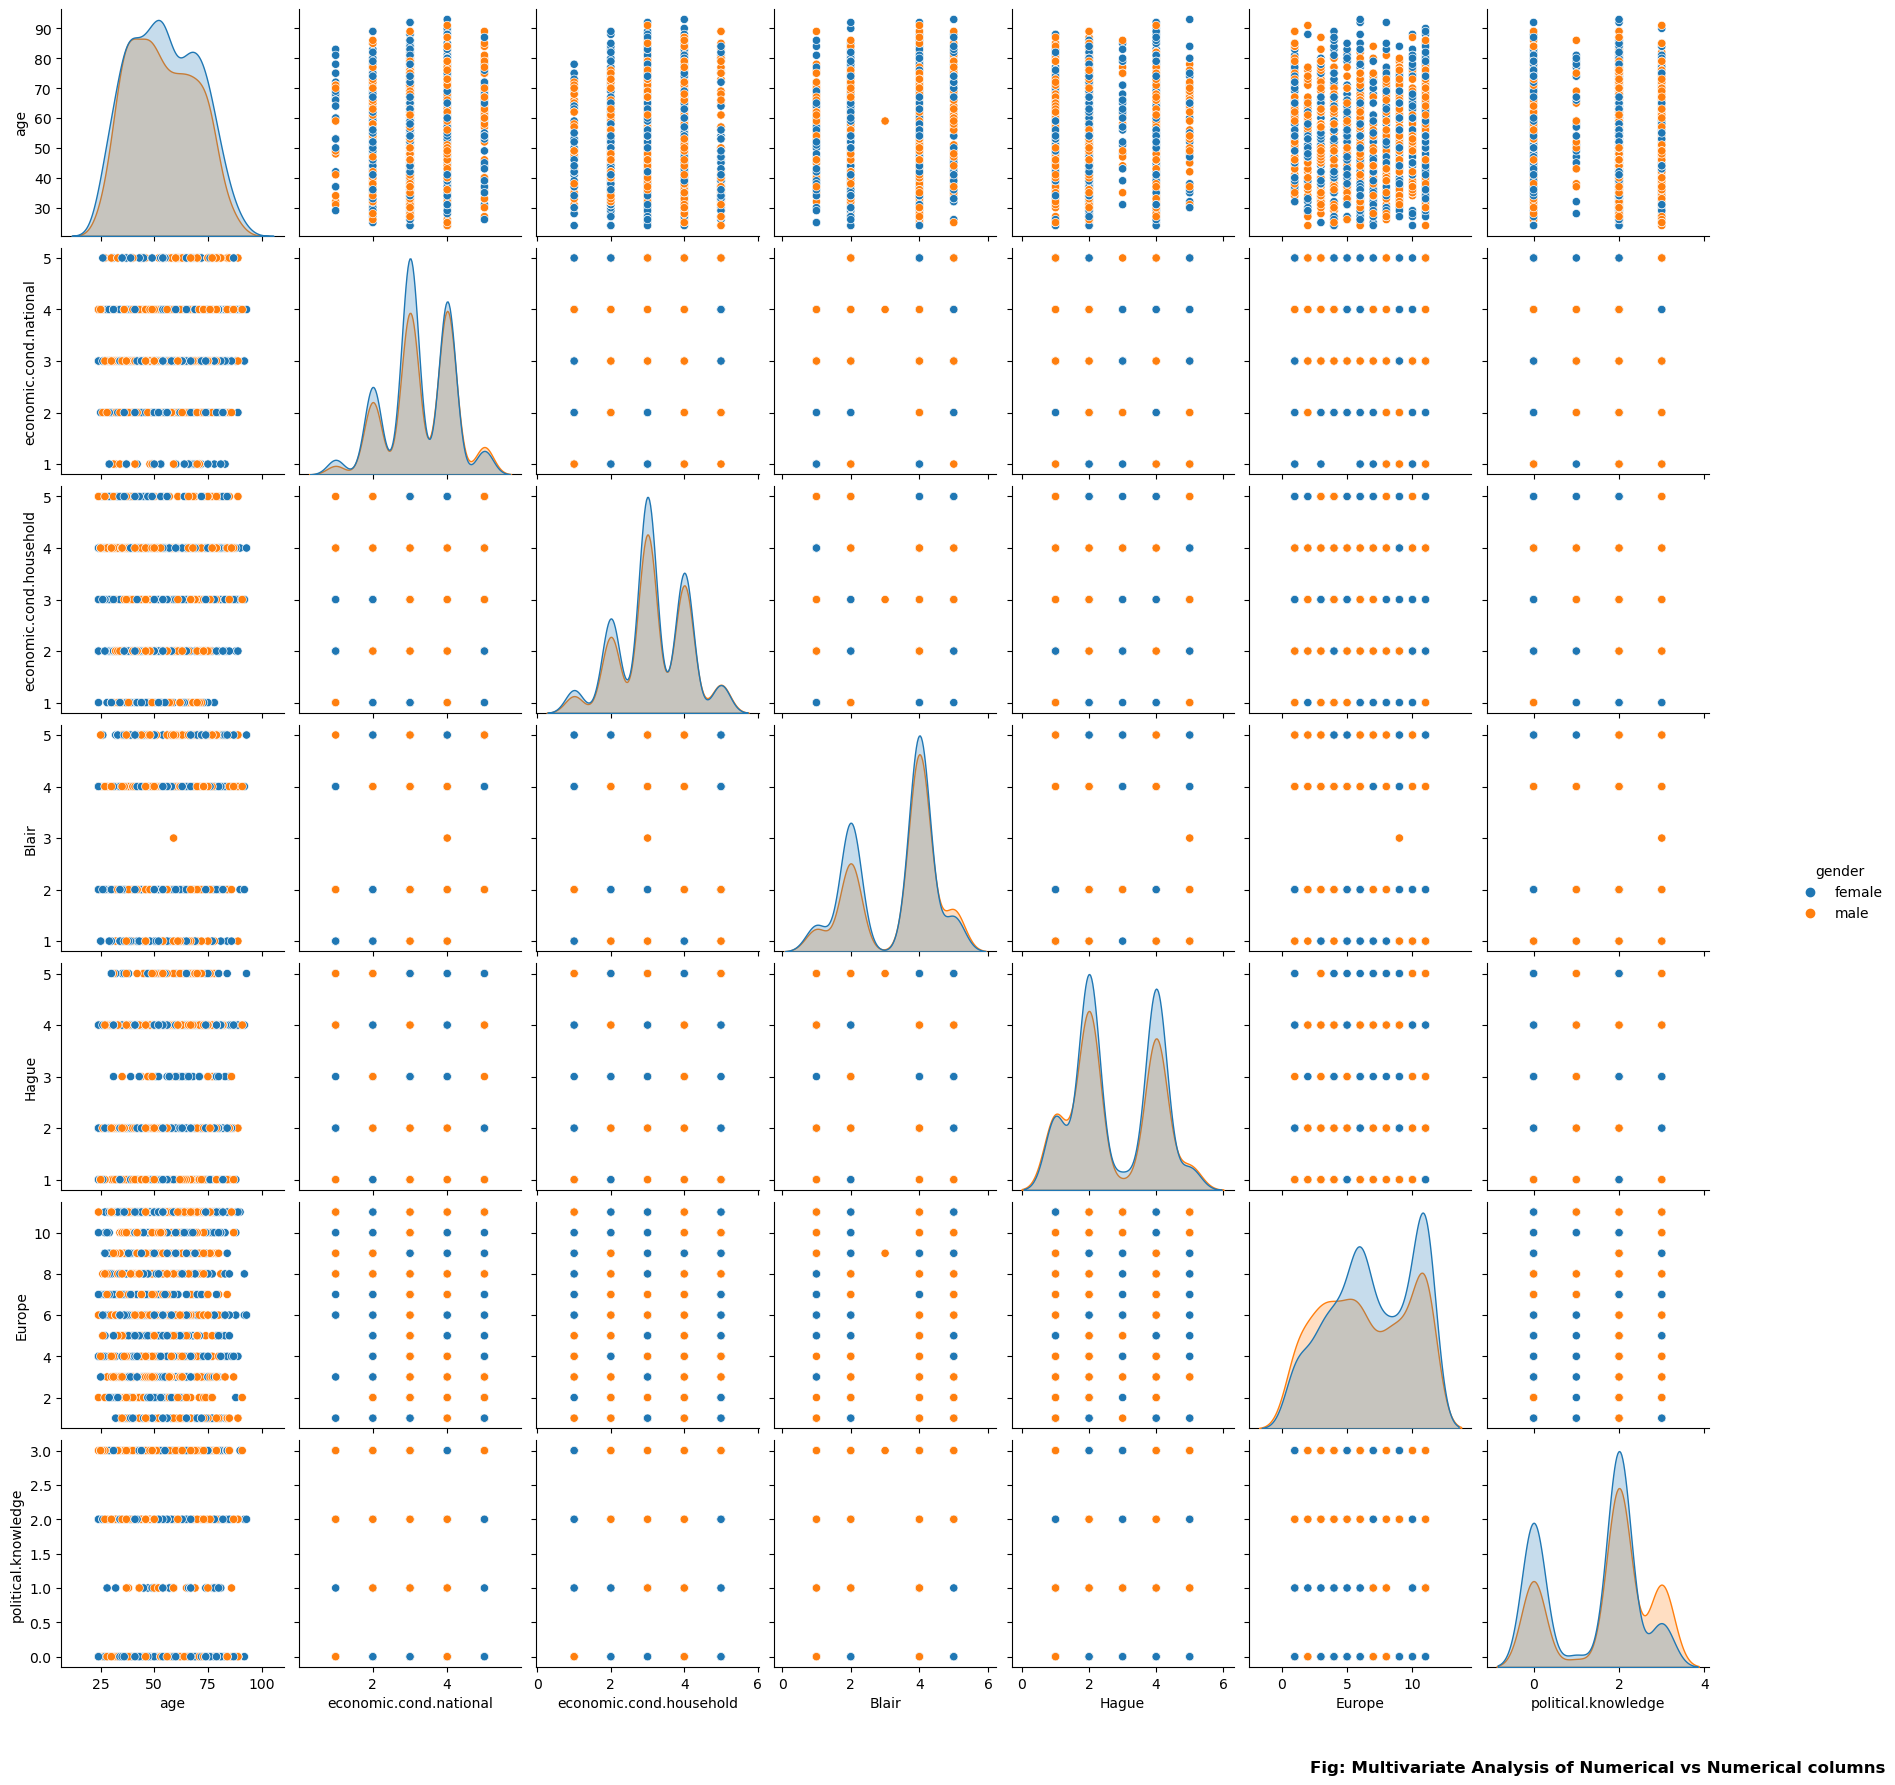

In [13]:
sns.pairplot(df, diag_kind="kde", hue = 'gender')  # to plot density curve instead of histogram on the diag)
plt.title("Fig: Multivariate Analysis of Numerical vs Numerical columns", y=-0.5, fontweight='bold')
plt.show()

### 1.1.7.3 Correlation Plot

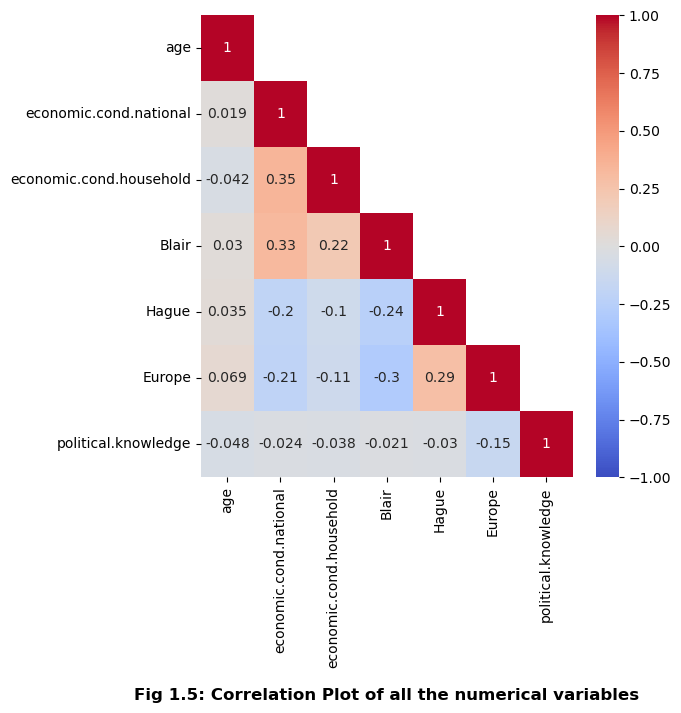

In [14]:
## Checking on the correlation between the variables
Cor=df.corr(method='pearson')
plt.figure(figsize=(6,6))
mask = np.array (Cor)
mask[np.tril_indices_from(mask)] =False
sns.heatmap(data =Cor, annot =True, mask =mask, vmax =1, vmin=-1, cmap ='coolwarm');
plt.title("Fig 1.5: Correlation Plot of all the numerical variables", y=-0.5, fontweight='bold')
plt.show()

### 1.1.7.4 Key meaningful observations on individual variables and the relationship between variables

* The median age of female voters voting for thhe Conservative leader is 58.29 while that of the male voters is 55 years. As we can see from the graph, this is higher than the median age of 53 years of females and 52.6 years of males voting for the Labour party.

* The national economic condition of people voting for the Labour party is more than that of the people voting for the Conservatives. That means, the richer people prefer the Labour party.

* The household economic condition of the people voting for the Labour party is around 3.2 which is more than that of the people voting for the Conservative party which is around 2.9. 

* The Labour leader Blair enjoys a median vote of 3.7 from the male population while a 3.57 from the female population. 

* Hague, being a Conservative leader enjoys a 3.6 median vote assessment from the male population while a 3.57 vote assessment from the female population.

* The Europe sentiment is very high among the Conservatives as compared to the Labour. The Conservative male voters constitute around 8.7 assessment and female a 8.5 in their Eurosceptic sentiment.

* The political knowledge is more among males as compared to the females. The people voting for the Conservatives seem to have a higher political knowledge as compared to the people voting for the Labour party.

* From the pairplot and the correlation plot, it is very clearly seen that there is no correlation between the numerical variables. 

## 1.2 Data Preprocessing

### 1.2.1 Prepare the data for modeling:
### Missing value treatment

In [15]:
# Are there any missing values?

df.isnull().sum()

vote                       0
age                        0
economic.cond.national     0
economic.cond.household    0
Blair                      0
Hague                      0
Europe                     0
political.knowledge        0
gender                     0
dtype: int64

#### Insights:
We can see that there are no missing values in any of the columns in the dataset.

### Check for duplicates

In [16]:
#Check for presence of duplicate rows
dup = df.duplicated()
print("No. of duplicate rows is", dup.sum())

No. of duplicate rows is 8


In [17]:
df.drop_duplicates(inplace=True)

In [18]:
dup = df.duplicated()
print("No. of duplicate rows is", dup.sum())

No. of duplicate rows is 0


#### Insights:

We can see that there were 8 duplicate rows in the dataset which we have dropped to clean the dataset.

### Outlier Detection and Treatment

In [19]:
df_num = df.select_dtypes(include=['int64','float64'])

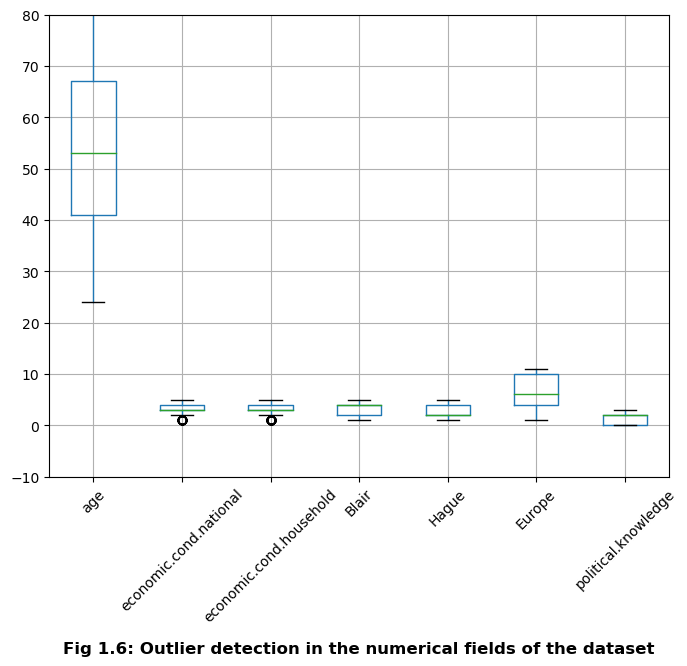

In [20]:
df_num.boxplot(figsize=(8,6))
plt.ylim(-10, 80)
plt.xticks(rotation=45)
plt.title("Fig 1.6: Outlier detection in the numerical fields of the dataset", y = -0.4, fontweight='bold')
plt.show()

In [21]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [22]:
for column in df_num.columns:
    lr,ur=remove_outlier(df_num[column])
    df_num[column]=np.where(df_num[column]>ur,ur,df_num[column])
    df_num[column]=np.where(df_num[column]<lr,lr,df_num[column])

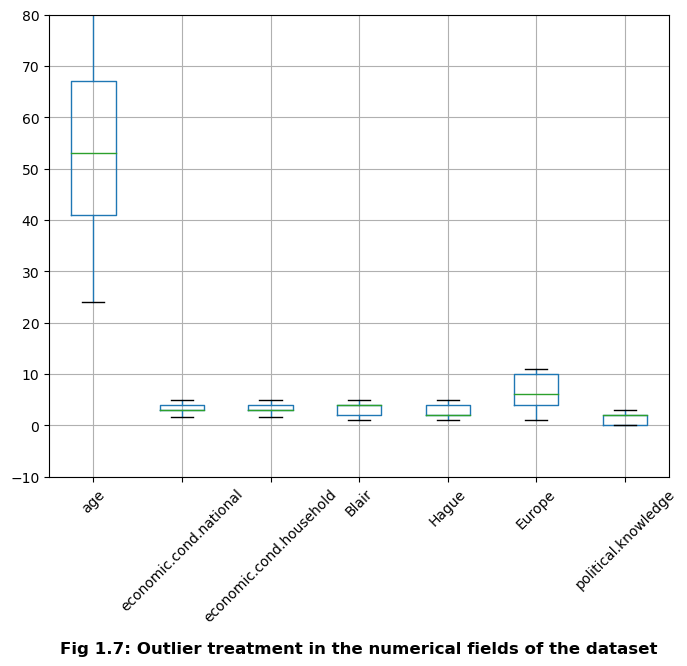

In [23]:
df_num.boxplot(figsize=(8,6))
plt.ylim(-10, 80)
plt.xticks(rotation=45)
plt.title("Fig 1.7: Outlier treatment in the numerical fields of the dataset", y = -0.4, fontweight='bold')
plt.show()

#### Insights:

There were a few outliers. We have treated them. Now, there are no outliers and we are good to proceed.

### 1.2.2 Encode the data

In [24]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1517 non-null   object
 1   age                      1517 non-null   int64 
 2   economic.cond.national   1517 non-null   int64 
 3   economic.cond.household  1517 non-null   int64 
 4   Blair                    1517 non-null   int64 
 5   Hague                    1517 non-null   int64 
 6   Europe                   1517 non-null   int64 
 7   political.knowledge      1517 non-null   int64 
 8   gender                   1517 non-null   object
dtypes: int64(7), object(2)
memory usage: 118.5+ KB


In [26]:
# Changing the object type columns to int type.
for feature in df.columns: 
    if (df[feature].dtype == 'object') or (df[feature].dtype == 'category'):
        df[feature] = pd.Categorical(df[feature]).codes

In [27]:
df.dtypes

vote                        int8
age                        int64
economic.cond.national     int64
economic.cond.household    int64
Blair                      int64
Hague                      int64
Europe                     int64
political.knowledge        int64
gender                      int8
dtype: object

In [28]:
df.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,43,3,3,4,1,2,2,0
1,1,36,4,4,4,4,5,2,1
2,1,35,4,4,5,2,3,2,1
3,1,24,4,2,2,1,4,0,0
4,1,41,2,2,1,1,6,2,1


#### Insights:

We have encoded the data and changed all the categorical columns into int type columns. 
The female has been encoded to 0 and male has been encoded to 1.
The Conservative vote has been encoded to 0 and Labour vote has been encoded to 1.

In [29]:
df['gender'].value_counts()

0    808
1    709
Name: gender, dtype: int64

### 1.2.3 Split the data

In [30]:
X = df.drop('vote', axis = 1)

In [31]:
Y = df.pop('vote')

In [32]:
X

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,43,3,3,4,1,2,2,0
1,36,4,4,4,4,5,2,1
2,35,4,4,5,2,3,2,1
3,24,4,2,2,1,4,0,0
4,41,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...
1520,67,5,3,2,4,11,3,1
1521,73,2,2,4,4,8,2,1
1522,37,3,3,5,4,2,2,1
1523,61,3,3,1,4,11,2,1


In [33]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
1520    0
1521    0
1522    1
1523    0
1524    0
Name: vote, Length: 1517, dtype: int8

### 1.2.4 Scaling the data

In [34]:
#Scale the data
from scipy.stats import zscore
X[['age']]=X[['age']].apply(zscore)

In [35]:
X

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,-0.716161,3,3,4,1,2,2,0
1,-1.162118,4,4,4,4,5,2,1
2,-1.225827,4,4,5,2,3,2,1
3,-1.926617,4,2,2,1,4,0,0
4,-0.843577,2,2,1,1,6,2,1
...,...,...,...,...,...,...,...,...
1520,0.812836,5,3,2,4,11,3,1
1521,1.195085,2,2,4,4,8,2,1
1522,-1.098410,3,3,5,4,2,2,1
1523,0.430587,3,3,1,4,11,2,1


### 1.2.5 Train-Test split

In [36]:
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size = 0.3, random_state = 1)

In [37]:
X_train.shape

(1061, 8)

In [38]:
X_test.shape

(456, 8)

In [39]:
y_train.shape

(1061,)

In [40]:
y_test.shape

(456,)

In [41]:
X_train

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
991,-1.289535,2,4,1,4,11,2,0
1274,-0.907286,4,3,4,4,6,0,1
649,0.430587,4,3,4,4,7,2,0
677,-0.461328,3,3,4,2,11,0,1
538,-0.652453,5,3,4,2,8,0,1
...,...,...,...,...,...,...,...,...
717,-0.142787,3,3,4,1,6,2,0
908,-0.716161,3,4,2,2,9,2,0
1100,1.258794,4,3,5,4,11,0,0
236,-1.480659,3,3,2,3,6,0,0


In [42]:
X_test

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
504,1.067669,3,3,2,2,8,2,0
369,-0.716161,3,2,4,2,8,3,1
1075,2.214417,5,5,5,2,1,2,1
1031,-0.461328,2,3,2,4,8,2,0
1329,-1.353243,5,4,4,4,8,0,1
...,...,...,...,...,...,...,...,...
562,-1.098410,4,2,4,2,8,1,1
928,-0.779869,2,2,1,2,7,2,0
276,2.150708,3,3,4,1,6,0,0
1128,-0.079079,4,3,4,2,10,0,0


#### Insights:

On seeing the descriptive summary, the mean and median of most of the columns are almost equal, not exactly equal, indicating a normal distribution. 

Scaling is necessary for the age column alone because age ranges from a minimum of 24 years to a maximum of 93 years. In this problem, age variable has a different range, compared to other variables. One variable, that is, age, might dominate another variable because it has a larger range than the other. To avoid this, we need to preprocess and scale our data so that each variable has a comparable impact on the outcome.

## 1.3 Model Building

### 1.3.1 Model Building (KNN, Naive bayes, Bagging, Boosting)

Make 4 models - Naive Bayes, KNN, Bagging and Boosting and comparing the RMSE to find the best model.
In Boosting, make 3 models, AdaBoosting, Gradient Boosting and XG Boosting.

Check Train and Test RMSE
Check Train and Test Scores

In [43]:
from sklearn import metrics
nb = GaussianNB()
knn=KNeighborsClassifier()
bag=BaggingClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()


models=[nb, knn, bag, abc, gbc, xgb]

rmse_train=[]
rmse_test=[]
accuracy_train=[]
accuracy_test=[]
recall_train = []
recall_test = []
precision_train = []
precision_test = []
f1_train=[]
f1_test=[]

for i in models:   
    i.fit(X_train,y_train)
    
    precision_train.append(precision_score(y_train,i.predict(X_train)))
    precision_test.append(precision_score(y_test,i.predict(X_test)))
    
    recall_train.append(recall_score(y_train,i.predict(X_train)))
    recall_test.append(recall_score(y_test,i.predict(X_test)))
    
    f1_train.append(f1_score(y_train,i.predict(X_train)))
    f1_test.append(f1_score(y_test,i.predict(X_test)))

    
    accuracy_train.append(accuracy_score(y_train,i.predict(X_train)))
    accuracy_test.append(accuracy_score(y_test,i.predict(X_test)))
        
    rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test))))
           
print(pd.DataFrame({'RMSE Train': rmse_train, 'RMSE Test': rmse_test, 'Train Precision': precision_train,'Test Precision': precision_test,
                   'Train Recall': recall_train,'Test Recall': recall_test,
                   'Train F1_score': f1_train,'Test F1_score': f1_test,
                   'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Naive Bayes','KNN Classifier','Bagging','AdaBoosting','Gradient Boosting','XGB Boosting']))
    

                   RMSE Train  RMSE Test  Train Precision  Test Precision  \
Naive Bayes          0.406127   0.421464         0.875486        0.865132   
KNN Classifier       0.376000   0.416228         0.889175        0.847826   
Bagging              0.118902   0.416228         0.995973        0.878378   
AdaBoosting          0.391955   0.431745         0.876433        0.847134   
Gradient Boosting    0.327789   0.402841         0.912371        0.852308   
XGB Boosting         0.092101   0.410925         0.990777        0.859873   

                   Train Recall  Test Recall  Train F1_score  Test F1_score  \
Naive Bayes            0.895225     0.867987        0.885246       0.866557   
KNN Classifier         0.915119     0.900990        0.901961       0.873600   
Bagging                0.984085     0.858086        0.989993       0.868114   
AdaBoosting            0.912467     0.877888        0.894087       0.862237   
Gradient Boosting      0.938992     0.914191        0.925490     

### 1.3.2 - Metrics of Choice (Justify the evaluation metrics)

Evaluation Metrics:

1) The data is not balanced as the Labour has 1063 votes and Conservatives have 462 votes. Hence, recall and precision scores are better evaluation metrics instead of accuracy scores. 

2) The F1 score is the harmonic mean of precision and recall scores. It combines the precision and recall scores of a model. The F1 score is a suitable metric when recall and precision must be optimized simultaneously, especially in imbalanced datasets. The F1 score seems to be best for Naive Bayes followed by KNN and AdaBoosting models. 

3) Precision score for training and testing data is closest for Naive Bayes, as in every other model, the difference of the precision scores between training and testing data is very large.

4) Recall score seems to be highest for Gradient Boosting and KNN for testing data. 

5) The F1 scores are good for Naive Bayes model.

6) The Root Mean Squared Error (RMSE) should be as low as possible for the model to perform better. The RMSE values for training and test data should be close to each other to avoid overfitting or underfitting issues. Here, Naive Bayes, KNN and AdaBoosting techniques show RMSE values of train and test dataset very close to each other. 

### Conclusion:

We will select models:
a) which have performed approximately similar on the train and test data set. 
b) which have high F1 score.
c) which have a low RMSE score. 

## 1.4 Model Performance Evaluation

### 1.4.1 Check the confusion matrix and classification metrics for all the models (for both train and test dataset) 

### Training data

In [44]:
# For training data:

models=[nb, knn, bag, abc, gbc, xgb]

for i in models:
    print(i)
    print(metrics.confusion_matrix(y_train, i.predict(X_train)))
    print(metrics.classification_report(y_train, i.predict(X_train)))

GaussianNB()
[[211  96]
 [ 79 675]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       307
           1       0.88      0.90      0.89       754

    accuracy                           0.84      1061
   macro avg       0.80      0.79      0.80      1061
weighted avg       0.83      0.84      0.83      1061

KNeighborsClassifier()
[[221  86]
 [ 64 690]]
              precision    recall  f1-score   support

           0       0.78      0.72      0.75       307
           1       0.89      0.92      0.90       754

    accuracy                           0.86      1061
   macro avg       0.83      0.82      0.82      1061
weighted avg       0.86      0.86      0.86      1061

BaggingClassifier()
[[304   3]
 [ 12 742]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       307
           1       1.00      0.98      0.99       754

    accuracy                           0.99      1061
   

### Testing data

In [45]:
# For testing data

models=[nb, knn, bag, abc, gbc, xgb]

for i in models:
    print(i)
    print(metrics.confusion_matrix(y_test, i.predict(X_test)))
    print(metrics.classification_report(y_test, i.predict(X_test)))

GaussianNB()
[[112  41]
 [ 40 263]]
              precision    recall  f1-score   support

           0       0.74      0.73      0.73       153
           1       0.87      0.87      0.87       303

    accuracy                           0.82       456
   macro avg       0.80      0.80      0.80       456
weighted avg       0.82      0.82      0.82       456

KNeighborsClassifier()
[[104  49]
 [ 30 273]]
              precision    recall  f1-score   support

           0       0.78      0.68      0.72       153
           1       0.85      0.90      0.87       303

    accuracy                           0.83       456
   macro avg       0.81      0.79      0.80       456
weighted avg       0.82      0.83      0.82       456

BaggingClassifier()
[[117  36]
 [ 43 260]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       153
           1       0.88      0.86      0.87       303

    accuracy                           0.83       456
   

### 1.4.2 ROC-AUC score and plot the curve

### ROC-AUC for training data

GaussianNB()
AUC: 0.888
KNeighborsClassifier()
AUC: 0.929
BaggingClassifier()
AUC: 0.998
AdaBoostClassifier()
AUC: 0.912
GradientBoostingClassifier()
AUC: 0.951
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
AUC: 1.000


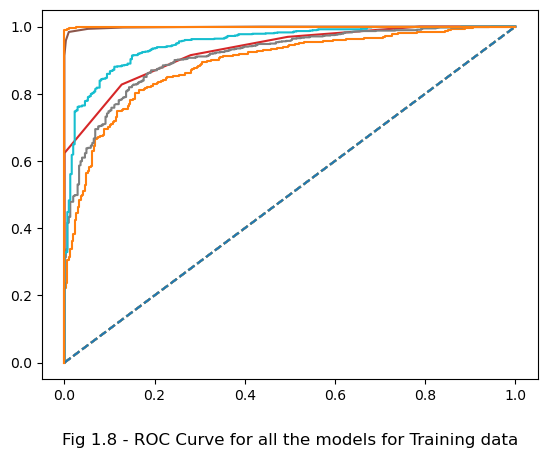

In [46]:
models=[nb, knn, bag, abc, gbc, xgb]

for i in models:
    print(i)
    probs = i.predict_proba(X_train)
    probs = probs[:, 1]
    auc = roc_auc_score(y_train, probs)
    print('AUC: %.3f' % auc)

    train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.plot(train_fpr, train_tpr);
    plt.title("Fig 1.8 - ROC Curve for all the models for Training data", y=-0.2);

### ROC-AUC for Testing data

GaussianNB()
AUC: 0.876
KNeighborsClassifier()
AUC: 0.880
BaggingClassifier()
AUC: 0.877
AdaBoostClassifier()
AUC: 0.881
GradientBoostingClassifier()
AUC: 0.899
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
AUC: 0.889


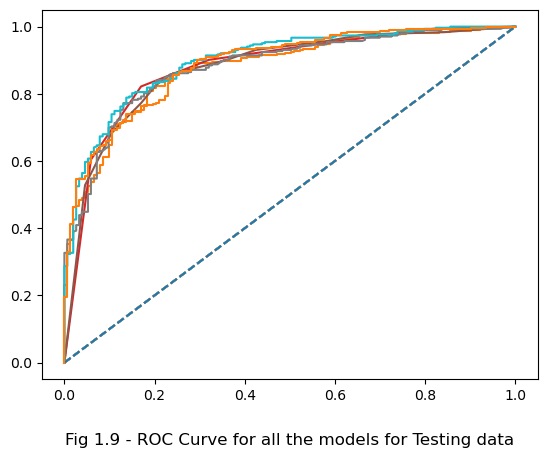

In [47]:
models=[nb, knn, bag, abc, gbc, xgb]

for i in models:
    print(i)
    probs = i.predict_proba(X_test)
    probs = probs[:, 1]
    auc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc)

    test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
    plt.plot([0, 1], [0, 1], linestyle='--')

    plt.plot(test_fpr, test_tpr);
    plt.title("Fig 1.9 - ROC Curve for all the models for Testing data", y= -0.2);

### 1.4.3 Comment on all the model performance

•	From the AUC scores, it is clear that Naïve Bayes is the best model so far as the training and the testing scores are very close to each other. 

•	XG Boost gives a very high training AUC score as 1 but the testing AUC score is 0.889. 

•	The ROC curve for testing dataset for all the models is almost the same.

•	For training dataset, the ROC curve is the best for XG Boost model as it covers the maximum area.

•	From the confusion matrix and the classification report, it is very clear that the F1 score is the best and very close to each other for training and testing datasets for Naïve Bayes model followed by KNN model, followed by Ada Boosting.

•	The classification reports for Bagging, Gradient Boosting and XG Boosting show that the F1 scores for testing dataset is very low compared to that of the training dataset, causing issues of overfitting or underfitting.


## 1.5 Model Performance improvement

### 1.5.1 Improve the model performance of bagging and boosting models by tuning the model 

In [48]:
# Bagging Tuning

bag = BaggingClassifier()
parameters = {
    'n_estimators': [400, 500, 600, 700],
    'max_features': [0.95, 1.0, 1.5],
    'max_samples' : [5, 6, 8]
    }
grid_search = GridSearchCV(estimator = bag, param_grid = parameters, cv = 3)

grid_search.fit(X_train,y_train)

print(grid_search.best_params_)


{'max_features': 1.0, 'max_samples': 8, 'n_estimators': 600}


In [49]:
bag_tuned=BaggingClassifier(n_estimators=600, max_features = 0.95, max_samples = 8)

In [50]:
# AdaBoost Tuning

param_grid = {
    'n_estimators': [10,50,100,500],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    }

grid_search = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = param_grid, cv = 3)

grid_search.fit(X_train,y_train)

print(grid_search.best_params_)

{'learning_rate': 0.1, 'n_estimators': 100}


In [51]:
abc_tuned=AdaBoostClassifier(n_estimators=100, learning_rate=0.1)

In [52]:
# GradientBoost Tuning

# Choose the type of classifier. 
gbc = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
## add from article
parameters = {
    "n_estimators": [50,70,100,150],
    "subsample":[0.9,1,1.1,.2,1.3],
    "max_features":[0.9,1,1.5,2,3,4]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(gbc, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=1, n_estimators=50, random_state=1,
                           subsample=0.2)

In [53]:
print(grid_obj.best_params_)

{'max_features': 1, 'n_estimators': 50, 'subsample': 0.2}


In [54]:
gbc_tuned = GradientBoostingClassifier(max_features=1,n_estimators=100,subsample=1)

In [55]:
# XGBoost Classifier

# Choose the type of classifier. 
xgb = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": [10,20],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.5,0.7,1],
    "learning_rate":[0.01,0.1,0.2],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

print(grid_obj.best_params_)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [3]:
print(grid_obj.best_params_)

NameError: name 'grid_obj' is not defined

In [57]:
xgb_tuned = XGBClassifier(colsample_bylevel=0.5, colsample_bytree= 0.5, gamma= 0, learning_rate= 0.01, n_estimators= 10, scale_pos_weight= 1, subsample= 0.5)

In [58]:
nb = GaussianNB()
knn=KNeighborsClassifier()
bag=BaggingClassifier()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()


models2=[nb, knn, bag, bag_tuned, abc, abc_tuned, gbc, gbc_tuned, xgb, xgb_tuned]


precision_train=[]
precision_test=[]

recall_train=[]
recall_test=[]

f1_train=[]
f1_test=[]

accuracy_train=[]
accuracy_test=[]


for i in models2:
    i.fit(X_train,y_train)
    
    precision_train.append(round(precision_score(y_train,i.predict(X_train)),2))
    precision_test.append(round(precision_score(y_test,i.predict(X_test)),2))
    
    recall_train.append(round(recall_score(y_train,i.predict(X_train)),2))
    recall_test.append(round(recall_score(y_test,i.predict(X_test)),2))
    
    f1_train.append(round(f1_score(y_train,i.predict(X_train)),2))
    f1_test.append(round(f1_score(y_test,i.predict(X_test)),2))
    
    accuracy_train.append(round(accuracy_score(y_train,i.predict(X_train)),2))
    accuracy_test.append(round(accuracy_score(y_test,i.predict(X_test)),2))
        
        
pd.DataFrame({'Train Precision': precision_train,'Test Precision': precision_test,
                   'Train Recall': recall_train,'Test Recall': recall_test,
                   'Train F1_score': f1_train,'Test F1_score': f1_test,
                   'Train Accuracy': accuracy_train,'Test Accuracy': accuracy_test},
            index=['Naive Bayes','KNN Classifier',
                   'Bagging','Bagging Tuned',
                   'AdaBoosting','AdaBoosting Tuned',
                   'Gradient Boosting','Gradient Boosting Tuned', 
                   'XG Boosting','XG Boosting Tuned'])

,Train Precision,Test Precision,Train Recall,Test Recall,Train F1_score,Test F1_score,Train Accuracy,Test Accuracy
Naive Bayes,0.88,0.87,0.90,0.87,0.89,0.87,0.84,0.82
KNN Classifier,0.89,0.85,0.92,0.90,0.90,0.87,0.86,0.83
Bagging,0.99,0.85,0.99,0.85,0.99,0.85,0.98,0.81
Bagging Tuned,0.78,0.76,0.97,0.97,0.87,0.85,0.79,0.77
AdaBoosting,0.88,0.85,0.91,0.88,0.89,0.86,0.85,0.81
AdaBoosting Tuned,0.85,0.83,0.93,0.89,0.89,0.86,0.84,0.81
Gradient Boosting,0.91,0.85,0.94,0.91,0.93,0.88,0.89,0.84
Gradient Boosting Tuned,0.90,0.85,0.93,0.91,0.91,0.88,0.88,0.83
XG Boosting,0.99,0.86,1.00,0.89,0.99,0.88,0.99,0.83
XG Boosting Tuned,0.71,0.66,1.00,1.00,0.83,0.80,0.71,0.66


### 1.5.2 Comment on the model performance improvement on training and test data

Bagging:
After performance tuning, the precision and accuracy have gone down, recall of the test data has improved and F1 score of test data remains the same while that for training data has reduced.

AdaBoosting:
After tuning, Almost all the parameters except Precision remains the same. Precision has reduced slightly after tuning.

Gradient Boosting:
All the evaluation metrics almost remain the same after tuning.

XG Boosting:
The Precision, F1 score and Accuracy have reduced after performance tuning. However, the Recall is 100% for training and testing dataset after tuning.


## 1.6 Final Model Selection

### 1.6.1 Compare all the model built so far 

After tuning, we observe the following:

On the basis of AUC score: Gradient Boost performs best on the test data.
On the basis of Precision: Naive Bayes is the best followed by AdaBoosting.
On the basis of Recall: XG Boosting Tuned performs the best followed by Bagging tuned.
On the basis of F1 score: Gradient Boosting Tuned performs the best followed by Naive Bayes and KNN.
On the basis of Accuracy: Gradient Boosting performs the best with 84% accuracy.

### 1.6.2 - Select the final model with the proper justification 

* We have an imbalanced dataset, with around 1063 voting for Labour and 462 voting for Conservatives.

* Accuracy tells us the percentage of correctly classified observations, however, it is misleading for imbalanced datasets as it will lean towards the majority values.

* When a binary classification model makes a prediction, we have 4 outcomes, true positives and true negatives (correct answers) and false positives and false negatives (incorrect answers). 

* Precision is the fraction of correct answers among observations for which our prediction is true, while Recall is the fraction of correct answers among all positive observations. The F1 score is commonly used as an evaluation metric in binary and multi-class classification. It's primarily used to compare the performance of two classifiersn.

* When the data is imbalanced and one class is a majority class, the best evaluation metric is F1 score. F1 score is used as an evaluation metric when False Positives and False Negatives are more important than the True Positives and True Negatives. 

* On the basis of the F1 score, the best final model is GRADIENT BOOSTING TUNED. It has a F1 score of 88% on the testing data and 91% on the training data. Both the values are very near to each other. 


### 1.6.3 Check the most important features in the final model and draw inferences.

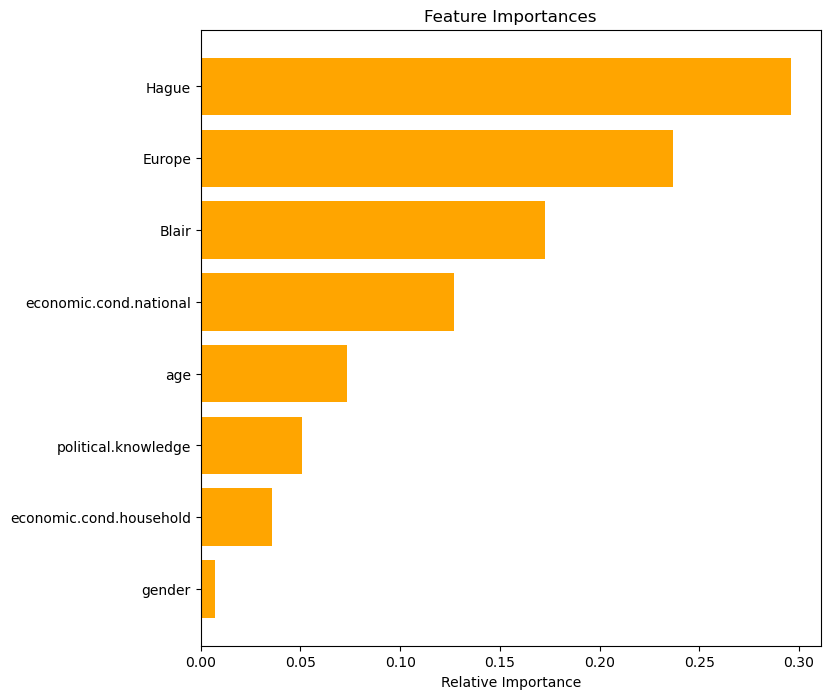

In [59]:
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(8,8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='orange', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

•	Europe followed by Hague and Blair are the most important features in Gradient Boosting Tuned model.
•	Respondents' attitudes toward European integration has played a major role in the voting pattern.   ‘Eurosceptic’ sentiment has been the key factor in predicting the party for which the voter votes for.
•	The Conservative Leader Hague’s assessment has played the next major role in voter prediction. The people’s assessment of the work done by Hague determines the party for which the voter casts his vote for.
•	Thirdly, The Labour Leader Blair’s assessment has played the next major role in voter prediction. The people’s assessment of the work done by Blair determines the party for which the voter casts his vote for.
•	Next is the national economic conditions. This has played a significant role in determining who the voter votes for. 
•	Age and Political knowledge follow next. The age of the voter and his/her political knowledge plays a major role in determining the vote of the voter.



## 1.7 Actionable Insights & Recommendations


### Compare all four models - Conclude with the key takeaways for the business

•	On the basis of AUC score: Gradient Boost performs best on the test data.
•	On the basis of Precision: Naive Bayes is the best followed by AdaBoosting.
•	On the basis of Recall: XG Boosting Tuned performs the best followed by Bagging tuned.
•	On the basis of F1 score: Gradient Boosting Tuned performs the best followed by Naive Bayes and KNN.
•	On the basis of Accuracy: Gradient Boosting performs the best with 84% accuracy.
•	Our main business objective is to build a model to predict which party the voter will vote for – the Labour or the Conservatives to create an exit poll that will help in predicting the overall win and seats won by a particular party.
•	Use Gradient Boosting with hyperparameter tuning to build the model as it gives the best optimised performance.
•	We have tuned the parameters as per our understanding and limitations. Huge combinations require large processing power. 
•	Gathering more data may help in training the model and thus improve the predicting powers.
•	The features of importance are Europe, Hague and Blair followed by national economic conditions, age and political knowledge. 
•	Eurosceptic sentiments seem to be the most important factor determining the vote going to which party. What the voter feels about the European integration plays the most important role in determining which party he will be voting for.
•	The assessment of the leaders Hague and Blair by the voter determines the party for whom he is casting his vote for.
•	The economic conditions of the country is the next important factor which tells the voter who to vote for.
•	Gender hardly plays a role in casting vote for the voters.


# Problem 2
 
## Problem Statement

In this particular project, we are going to work on the inaugural corpora from the nltk in Python. We will be looking at the following speeches of the Presidents of the United States of America:

President Franklin D. Roosevelt in 1941
President John F. Kennedy in 1961
President Richard Nixon in 1973
Code Snippet to extract the three speeches:

"
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')
"

## 2.1 Problem Definition - Define the problem and Perform Exploratory Data Analysis

### 2.1.1 Import libraries

In [60]:
import numpy as np
import pandas as pd
import nltk
import random
import string
import matplotlib as plt
import seaborn as sns

### 2.1.2 Import speeches

In [61]:
import nltk
nltk.download('inaugural')
from nltk.corpus import inaugural
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')

[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\ramas\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


'Mr. Vice President, Mr. Speaker, Mr. Chief Justice, Senator Cook, Mrs. Eisenhower, and my fellow citizens of this great and good country we share together:\n\nWhen we met here four years ago, America was bleak in spirit, depressed by the prospect of seemingly endless war abroad and of destructive conflict at home.\n\nAs we meet here today, we stand on the threshold of a new era of peace in the world.\n\nThe central question before us is: How shall we use that peace? Let us resolve that this era we are about to enter will not be what other postwar periods have so often been: a time of retreat and isolation that leads to stagnation at home and invites new danger abroad.\n\nLet us resolve that this will be what it can become: a time of great responsibilities greatly borne, in which we renew the spirit and the promise of America as we enter our third century as a nation.\n\nThis past year saw far-reaching results from our new policies for peace. By continuing to revitalize our traditional

### 2.1.3 Find the number of Character, words & sentences in all three speeches

### Roosevelt Speech

In [62]:
print(inaugural.raw('1941-Roosevelt.txt'))

On each national day of inauguration since 1789, the people have renewed their sense of dedication to the United States.

In Washington's day the task of the people was to create and weld together a nation.

In Lincoln's day the task of the people was to preserve that Nation from disruption from within.

In this day the task of the people is to save that Nation and its institutions from disruption from without.

To us there has come a time, in the midst of swift happenings, to pause for a moment and take stock -- to recall what our place in history has been, and to rediscover what we are and what we may be. If we do not, we risk the real peril of inaction.

Lives of nations are determined not by the count of years, but by the lifetime of the human spirit. The life of a man is three-score years and ten: a little more, a little less. The life of a nation is the fullness of the measure of its will to live.

There are men who doubt this. There are men who believe that democracy, as a form 

In [63]:
num_chars1 = len(inaugural.raw('1941-Roosevelt.txt'))
num_words1 = len(inaugural.words ('1941-Roosevelt.txt'))
num_sents1 = len(inaugural.sents ('1941-Roosevelt.txt'))
print(" The numbers of characters in Roosevelt 1941 speech is:", num_chars1)
print(" The numbers of words in Roosevelt 1941 speech is:", num_words1)
print(" The numbers of sentences in Roosevelt 1941 speech is:", num_sents1)

 The numbers of characters in Roosevelt 1941 speech is: 7571
 The numbers of words in Roosevelt 1941 speech is: 1536
 The numbers of sentences in Roosevelt 1941 speech is: 68


### Kennedy Speech

In [64]:
num_chars2 = len(inaugural.raw('1961-Kennedy.txt'))
num_words2 = len(inaugural.words ('1961-Kennedy.txt'))
num_sents2 = len(inaugural.sents ('1961-Kennedy.txt'))
print(" The numbers of characters in Kennedy 1961 speech is:", num_chars2)
print(" The numbers of words in Kennedy 1961 speech is:", num_words2)
print(" The numbers of sentences in Kennedy 1961 speech is:", num_sents2)

 The numbers of characters in Kennedy 1961 speech is: 7618
 The numbers of words in Kennedy 1961 speech is: 1546
 The numbers of sentences in Kennedy 1961 speech is: 52


### Nixon Speech

In [65]:
num_chars3 = len(inaugural.raw('1973-Nixon.txt'))
num_words3 = len(inaugural.words ('1973-Nixon.txt'))
num_sents3 = len(inaugural.sents ('1973-Nixon.txt'))
print(" The numbers of characters in Nixon 1973 speech is:", num_chars3)
print(" The numbers of words in Nixon 1973 speech is:", num_words3)
print(" The numbers of sentences in Nixon 1973 speech is:", num_sents3)

 The numbers of characters in Nixon 1973 speech is: 9991
 The numbers of words in Nixon 1973 speech is: 2028
 The numbers of sentences in Nixon 1973 speech is: 69


In [66]:
# Putting all the speeches into a dataframe speech1, speech2, speech3

speech1 =pd.DataFrame ({"Roosevelt_speech" : [num_chars1, num_words1, num_sents1]},
                      index = ['characters', 'words', 'sentences'])

In [67]:
speech1

,Roosevelt_speech
characters,7571
words,1536
sentences,68


In [68]:
speech2 =pd.DataFrame ({"Kennedy_speech" : [num_chars2, num_words2, num_sents2]},
                      index = ['characters', 'words', 'sentences'])
speech2

,Kennedy_speech
characters,7618
words,1546
sentences,52


In [69]:
speech3 =pd.DataFrame ({"Nixon_speech" : [num_chars3, num_words3, num_sents3]},
                      index = ['characters', 'words', 'sentences'])
speech3

,Nixon_speech
characters,9991
words,2028
sentences,69


## 2.2 Text Cleaning

### 2.2.1 Stopword Removal

In [70]:
## Converting to Lower Case

raw1 = inaugural.raw("1941-Roosevelt.txt").lower()
raw2 = inaugural.raw("1961-Kennedy.txt").lower()
raw3 = inaugural.raw("1973-Nixon.txt").lower()

In [71]:
stopwords = nltk.corpus.stopwords.words('english') + list(string.punctuation) #alternative way

In [72]:
## Cleaning the special characters (/@$: etc)
## from Regular Expressions package use substitution function
## re.sub() function for string substitution using regular expressions
## Except(Not) a-z, A-z, replace evereything with a space in the raw file
import re
raw1 = re.sub("[^a-zA-Z]"," ", str(raw1))
raw2 = re.sub("[^a-zA-Z]"," ", str(raw2))
raw3 = re.sub("[^a-zA-Z]"," ", str(raw3))

In [73]:
## Tokenization - Splitting the text files into words
tokens1 = nltk.word_tokenize(raw1)
print(tokens1)

['on', 'each', 'national', 'day', 'of', 'inauguration', 'since', 'the', 'people', 'have', 'renewed', 'their', 'sense', 'of', 'dedication', 'to', 'the', 'united', 'states', 'in', 'washington', 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'create', 'and', 'weld', 'together', 'a', 'nation', 'in', 'lincoln', 's', 'day', 'the', 'task', 'of', 'the', 'people', 'was', 'to', 'preserve', 'that', 'nation', 'from', 'disruption', 'from', 'within', 'in', 'this', 'day', 'the', 'task', 'of', 'the', 'people', 'is', 'to', 'save', 'that', 'nation', 'and', 'its', 'institutions', 'from', 'disruption', 'from', 'without', 'to', 'us', 'there', 'has', 'come', 'a', 'time', 'in', 'the', 'midst', 'of', 'swift', 'happenings', 'to', 'pause', 'for', 'a', 'moment', 'and', 'take', 'stock', 'to', 'recall', 'what', 'our', 'place', 'in', 'history', 'has', 'been', 'and', 'to', 'rediscover', 'what', 'we', 'are', 'and', 'what', 'we', 'may', 'be', 'if', 'we', 'do', 'not', 'we', 'risk', 'the', 'real', 'peril

In [74]:
## Tokenization - Splitting the text files into words
tokens2 = nltk.word_tokenize(raw2)

tokens3 = nltk.word_tokenize(raw3)

In [75]:
print(len(tokens1))
print(len(tokens2))
print(len(tokens3))

1348
1371
1819


In [76]:
## Stop words - Removing words that are not useful or Removing meaningless words
from nltk.corpus import stopwords
en_stop = stopwords.words ('english')
stopped_tokens1 = [i for i in tokens1 if not i in en_stop]
stopped_tokens2 = [i for i in tokens2 if not i in en_stop]
stopped_tokens3 = [i for i in tokens3 if not i in en_stop]

In [77]:
print(len(stopped_tokens1))
print(len(stopped_tokens2))
print(len(stopped_tokens3))

625
688
833


In [78]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ramas\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [79]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ramas\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### 2.2.2 Stemming

In [80]:
## Stemming Using Lemmatizer - Stem the words to its root word from n1tk import WordNetUemmatizer
lt = nltk.WordNetLemmatizer()
texts1 = [lt.lemmatize(i) for i in stopped_tokens1]
texts2 = [lt.lemmatize(i) for i in stopped_tokens2]
texts3 = [lt.lemmatize(i) for i in stopped_tokens3]

### 2.2.3 Find the 3 most common words used in all three speeches

In [81]:
## Top 3 frequency occuring words
## FreqDist means Frequent Distribution
roosevelt_3 = nltk.FreqDist(texts1).most_common(3)
roosevelt_3

[('nation', 15), ('life', 11), ('know', 10)]

In [82]:
kennedy_3 = nltk.FreqDist(texts2).most_common(3)
kennedy_3

[('let', 16), ('u', 12), ('world', 8)]

In [83]:
nixon_3 = nltk.FreqDist(texts3).most_common(3)
nixon_3

[('u', 26), ('let', 22), ('america', 21)]

### Insights:

After cleaning the text, we see that the most common words are:
In Roosevelt speech, they are nation, life and know
In Kennedy speech, they are let, u and world
In Nixon speech, they are u, let, america.

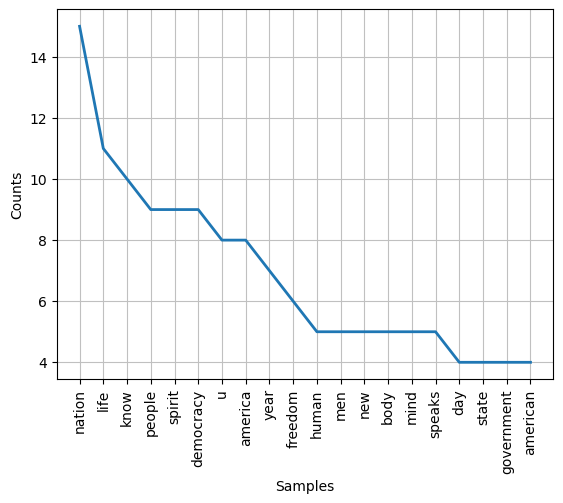

In [84]:
## Plotting the top 20 words occuring frequently in Roosevelt speech:
import matplotlib as plt
nltk.FreqDist(texts1).plot(20);


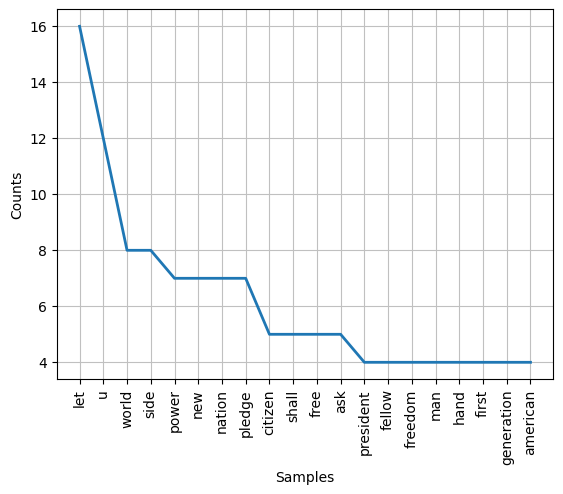

In [85]:
## Plotting the top 20 words occuring frequently in Kennedy speech:
nltk.FreqDist(texts2).plot(20);

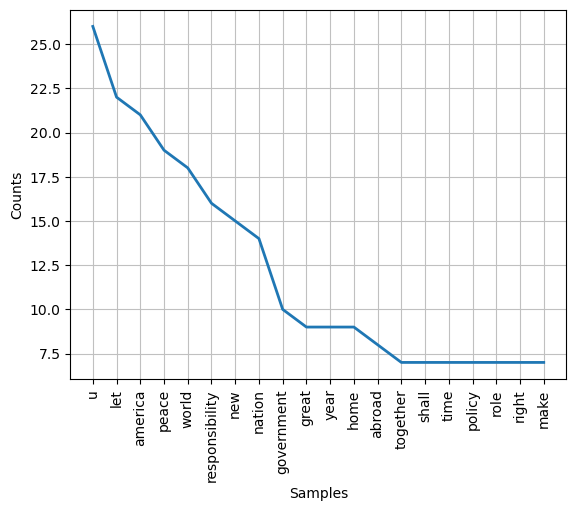

In [86]:
## Plotting the top 20 words occuring frequently in Nixon speech:
nltk.FreqDist(texts3).plot(20);

## 2.3 Plot Word cloud of all three speeches

### 2.3.1 Show the most common words used in all three speeches in the form of word clouds

#### Word Cloud of Roosevelt Speech

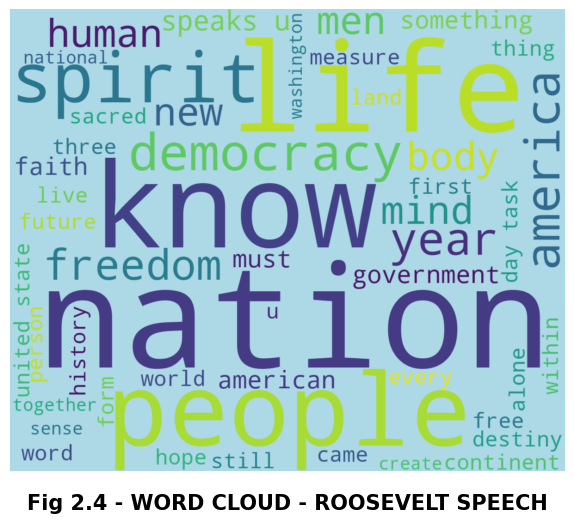

In [87]:
## Creating WordCloud
#!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

new_words = set(STOPWORDS) #set function removes the duplicates


plt.subplots(figsize=(8,6))
wordcloud = WordCloud (background_color='lightblue', max_words=50,
                       width=1200, stopwords=new_words,
                       height=1000).generate(" ".join (texts1))
plt.title("Fig 2.4 - WORD CLOUD - ROOSEVELT SPEECH", fontsize=15, fontweight= 'bold', y=-0.1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis ('off')
plt.show()

#### Word Cloud of Kennedy Speech

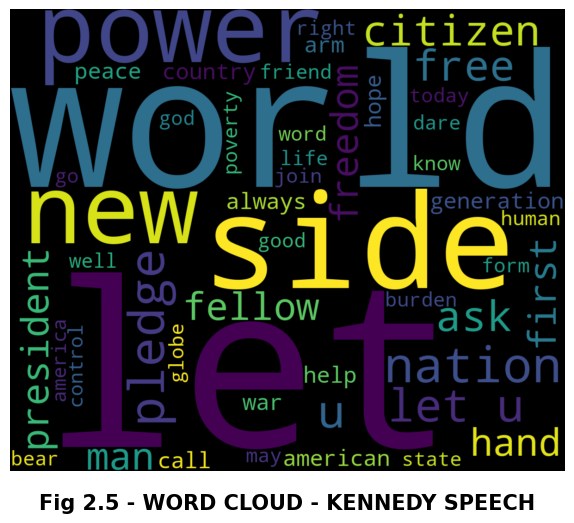

In [88]:
new_words = set(STOPWORDS) #set function removes the duplicates
#new_words.update (['u', 'seek' , 'let', 'le'])

plt.subplots(figsize=(8,6))
wordcloud = WordCloud (background_color='black', max_words=50,
                       width=1200, stopwords=new_words,
                       height=1000).generate(" ".join (texts2))
plt.title("Fig 2.5 - WORD CLOUD - KENNEDY SPEECH", fontsize=15, fontweight = 'bold', y= -0.1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis ('off')
plt.show()

#### #### Word Cloud of Nixon Speech

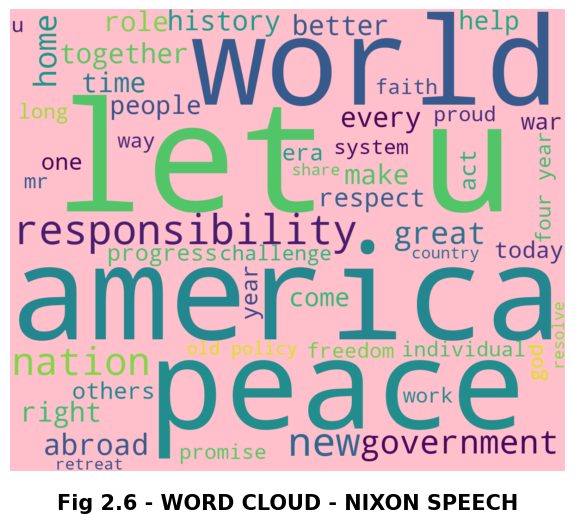

In [89]:
new_words = set(STOPWORDS) #set function removes the duplicates
#new_words.update (['seek' , 'le, 'le'])

plt.subplots(figsize=(8,6))
wordcloud = WordCloud (background_color='pink', max_words=50,
                       width=1200, stopwords=new_words,
                       height=1000).generate(" ".join (texts3))
plt.title("Fig 2.6 - WORD CLOUD - NIXON SPEECH", fontsize=15, fontweight = 'bold', y = -0.1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis ('off')
plt.show()

##############################################END OF PROJECT###############################################################